# Defining the Question

### a) Specifying the Question

> Nairobi Hospital requires a model that determines whether or not a patient's symptoms indicate that the patient has hypothyroidism.

### b) Defining the Metric for Success


> The metric of success is if we can create a model that can predict/classify whether a patient has hypothyroidism or not based on their symptoms.

### c) Understanding the context


> Nairobi Hospital being a healthcare institution that is vital for the well-being of the Kenyan citizens should always ensure that they can increasingly provide higher healthcare standards to potential patients, that includes accurate diagnosis. Misdiagnosis leads to loss of money by patients, let alone the risk to their lives and wel-being. Therefore, an accurate model can greatly reduce said risk. This model shouldn't be prescriptive but act as a screen before the doctor comes in. It is imperative that this model is not only accurate but precise.

### d) Recording the Experimental Design


> The following design was used:

*   Data importation
*   Data Reading & Cleaning
*   EDA
*   Checking multicolinearity
*   Feature Engineering
*   Model Building
*   Evaluating/Assessing Model
*   Prediction

### e) Data Relevance

> This was evaluated against the metric of success (after implementation of solution)

Dataset Columns/Features:

*   Age
*  Sex
*  on_thyroxine
*  query_on_thyroxine
*  on_antithyroid_medicationthyroid_surgery
*  query_hypothyroid
*  query_hyperthyroid
*  pregnant
*  sick
*  tumor
*  lithium
*  goitre
*  TSH_measured
*  TSH
*  T3_measured
*  T3
*  TT4_measured
*  TT4

# Data Reading & Cleaning

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score, classification_report, f1_score,r2_score


## Importing the dataset

In [ ]:
#load dataset
hypo = pd.read_csv('hypothyroid.csv')


In [ ]:
#check head
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
#check tail
hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
#check number of records
hypo.shape

(3163, 26)

> Data preparation

In [ ]:
#checking column types
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
#converting numerical cols
hypo.age = pd.to_numeric(hypo.age, errors='coerce')
hypo.TSH = pd.to_numeric(hypo.TSH, errors='coerce')
hypo.T3 = pd.to_numeric(hypo.T3, errors='coerce')
hypo.TT4 = pd.to_numeric(hypo.TT4, errors='coerce')
hypo.T4U = pd.to_numeric(hypo.T4U, errors='coerce')
hypo.FTI = pd.to_numeric(hypo.FTI, errors='coerce')
hypo.TBG = pd.to_numeric(hypo.TBG, errors='coerce')

In [ ]:
#checking column types again
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [ ]:
#checking summary stats
hypo.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [ ]:
#checking for nulls
hypo.isnull().sum()

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

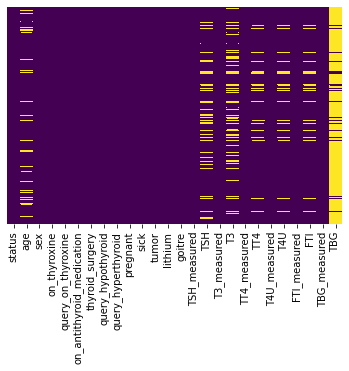

In [ ]:
#visually looking at the nulls in the dataset
sns.heatmap(hypo.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
#% of nulls in data per columns
(hypo.isnull().sum()/len(hypo))*100

status                        0.000000
age                          14.100537
sex                           0.000000
on_thyroxine                  0.000000
query_on_thyroxine            0.000000
on_antithyroid_medication     0.000000
thyroid_surgery               0.000000
query_hypothyroid             0.000000
query_hyperthyroid            0.000000
pregnant                      0.000000
sick                          0.000000
tumor                         0.000000
lithium                       0.000000
goitre                        0.000000
TSH_measured                  0.000000
TSH                          14.796080
T3_measured                   0.000000
T3                           21.972811
TT4_measured                  0.000000
TT4                           7.872273
T4U_measured                  0.000000
T4U                           7.840658
FTI_measured                  0.000000
FTI                           7.809042
TBG_measured                  0.000000
TBG                      

In [ ]:
#dropping nulls for age
hypo.dropna(subset=['age'], inplace=True)

#dropping last column because of too many nulls
#hypo.drop('TBG', axis=1, inplace=True)
#since theres a description column for all numeric fill nulls with zero

hypo.fillna(0,inplace=True)

> about 400 records (just under 20% of the data) were dropped due to having nulls in the age column and also the TBG column was completely dropped. We left some nulls in the data which we'll be dealt with before using SVM

In [ ]:
#checking summary stats
hypo.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2717.00000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,51.154214,5.07495,1.492050,100.366544,0.909993,103.050350,2.636768
std,19.294405,22.23196,1.205217,52.975889,0.343717,51.498236,10.363246
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.00000,0.400000,76.000000,0.830000,84.000000,0.000000
50%,54.000000,0.30000,1.600000,100.000000,0.950000,104.000000,0.000000
75%,67.000000,1.70000,2.200000,125.000000,1.060000,126.000000,0.000000
max,98.000000,530.00000,10.200000,450.000000,2.030000,450.000000,122.000000


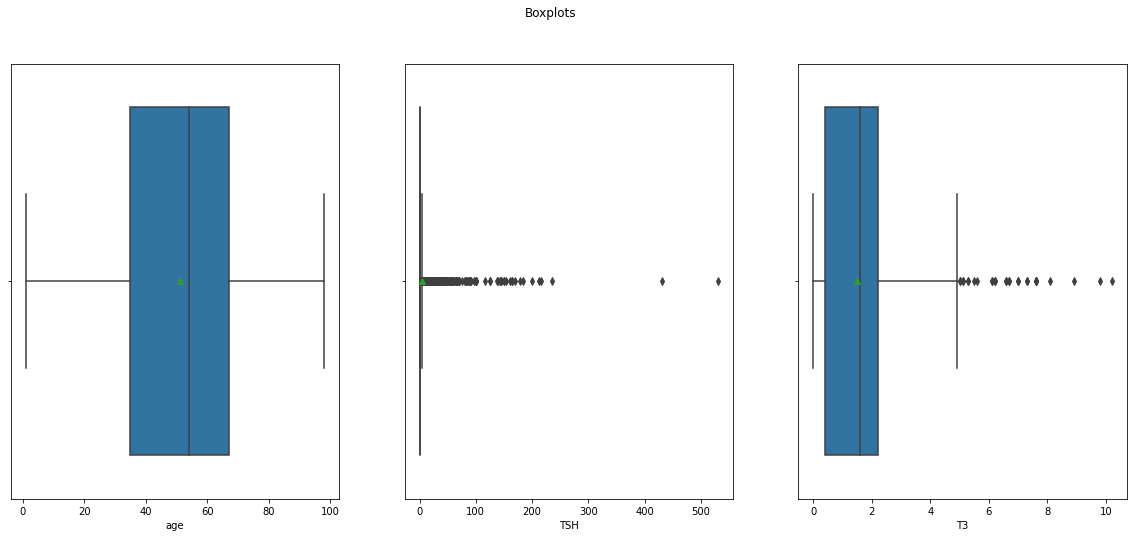

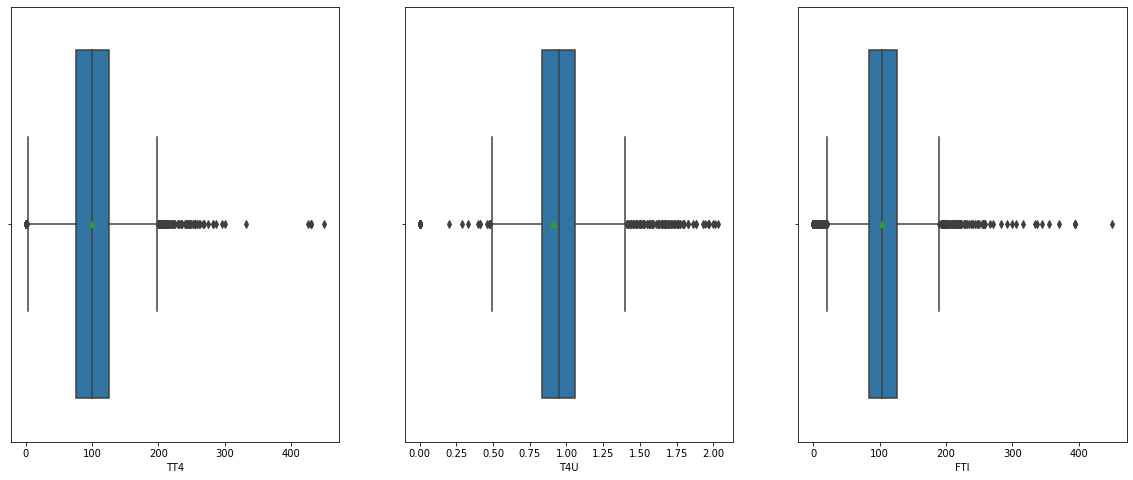

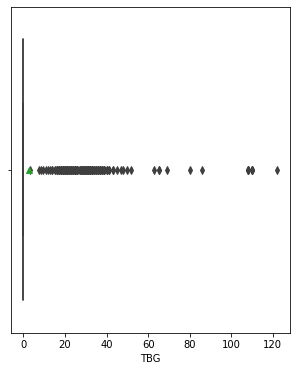

In [ ]:
#checking for Outliers and Anomalies in the numerical columns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 8))
fig.suptitle('Boxplots')
sns.boxplot(x = hypo['age'], ax=ax1, showmeans = True)
sns.boxplot(x = hypo['TSH'], ax=ax2, showmeans = True)
sns.boxplot(x = hypo['T3'], ax=ax3, showmeans = True)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 8))
sns.boxplot(x = hypo['TT4'], ax=ax4, showmeans = True)
sns.boxplot(x = hypo['T4U'], ax=ax5, showmeans = True)
sns.boxplot(x = hypo['FTI'], ax=ax6, showmeans = True)

fig, (ax7) = plt.subplots(1,1, figsize=(5, 6))
sns.boxplot(x = hypo['TBG'], ax=ax7, showmeans = True)
plt.show()

# Exploratory Data Analysis

In [ ]:
# Ploting the univariate summaries and recording our observations
#
hypo.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2717.00000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,51.154214,5.07495,1.492050,100.366544,0.909993,103.050350,2.636768
std,19.294405,22.23196,1.205217,52.975889,0.343717,51.498236,10.363246
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.00000,0.400000,76.000000,0.830000,84.000000,0.000000
50%,54.000000,0.30000,1.600000,100.000000,0.950000,104.000000,0.000000
75%,67.000000,1.70000,2.200000,125.000000,1.060000,126.000000,0.000000
max,98.000000,530.00000,10.200000,450.000000,2.030000,450.000000,122.000000


In [ ]:

# Ploting the univariate summaries and recording our observations
def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Nulls', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].mode().values[0], df[col].mean(), df[col].min(), 
                         df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]

    else:
     out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),df[col].mode().values[0],'-', '-', '-', '-', 
                        '-', '-', '-', '-', '-']

  return out_df

uni_stats(hypo)

,Count,Nulls,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
status,2717,0,2,negative,-,-,-,-,-,-,-,-,-
age,2717,0,92,59,51.1542,1,35,54,67,98,19.2944,-0.162462,-0.96076
sex,2717,0,3,F,-,-,-,-,-,-,-,-,-
on_thyroxine,2717,0,2,f,-,-,-,-,-,-,-,-,-
query_on_thyroxine,2717,0,2,f,-,-,-,-,-,-,-,-,-
on_antithyroid_medication,2717,0,2,f,-,-,-,-,-,-,-,-,-
thyroid_surgery,2717,0,2,f,-,-,-,-,-,-,-,-,-
query_hypothyroid,2717,0,2,f,-,-,-,-,-,-,-,-,-
query_hyperthyroid,2717,0,2,f,-,-,-,-,-,-,-,-,-
pregnant,2717,0,2,f,-,-,-,-,-,-,-,-,-


> As can be seen from the above summary table:

*  Most of the numerical data is in acceptable range for Skew and Kurtosis,
except TSH (Skew approx 11, Kurtosis approx 188). This points to the data being in general right skewed/ positively skewed and thus not normally distributed.

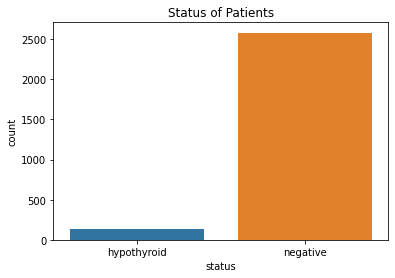

In [ ]:
#Count plots
sns.countplot(x='status',data=hypo)
plt.title('Status of Patients')
plt.show()

> We can see that an overwhelming majority of the patients are negative which means we have an imbalanced class scenario which affects how modeling will be done.

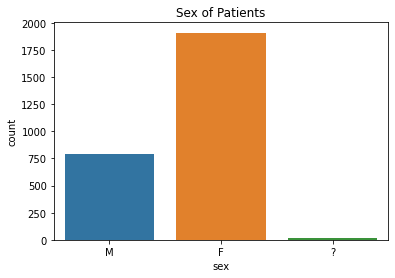

In [ ]:
#Count plots
sns.countplot(x='sex',data=hypo)
plt.title('Sex of Patients')
plt.show()

>Some of the data is for unknown genders, maybe during entry it was forgotten. This may pose a major issue in model building but will be dealt with.

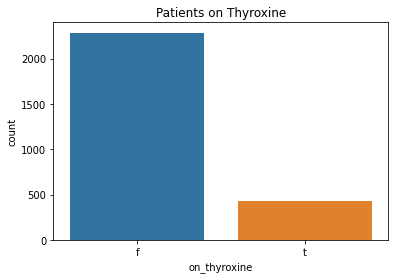

In [ ]:
#Count plots
sns.countplot(x='on_thyroxine',data=hypo)
plt.title('Patients on Thyroxine')
plt.show()

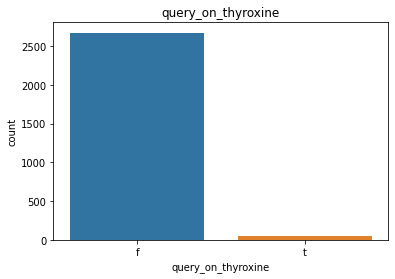

In [ ]:
#Count plots
sns.countplot(x='query_on_thyroxine',data=hypo)
plt.title('query_on_thyroxine')
plt.show()

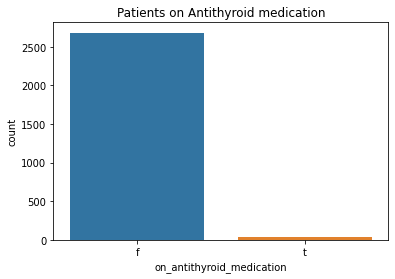

In [ ]:
#Count plots
sns.countplot(x='on_antithyroid_medication',data=hypo)
plt.title('Patients on Antithyroid medication')
plt.show()

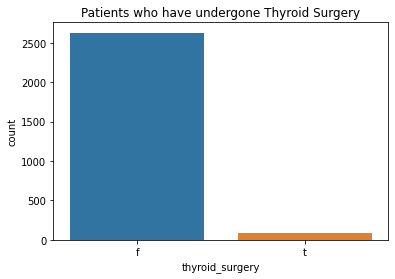

In [ ]:
#Count plots
sns.countplot(x='thyroid_surgery',data=hypo)
plt.title('Patients who have undergone Thyroid Surgery')
plt.show()

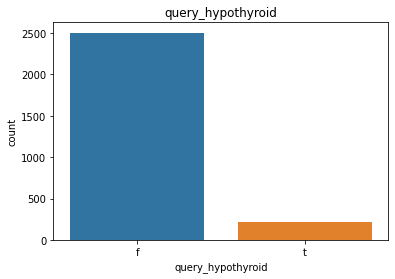

In [ ]:
#Count plots
sns.countplot(x='query_hypothyroid',data=hypo)
plt.title('query_hypothyroid')
plt.show()

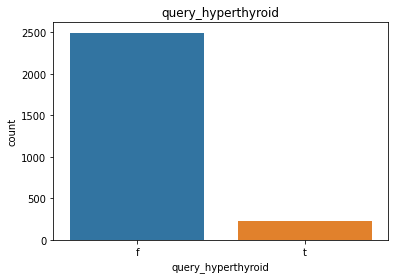

In [ ]:
#Count plots
sns.countplot(x='query_hyperthyroid',data=hypo)
plt.title('query_hyperthyroid')
plt.show()

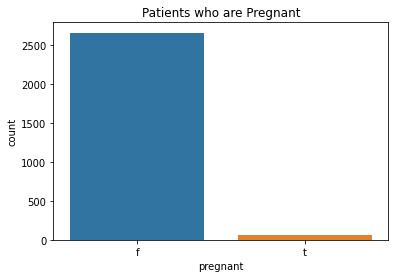

In [ ]:
#Count plots
sns.countplot(x='pregnant',data=hypo)
plt.title('Patients who are Pregnant')
plt.show()

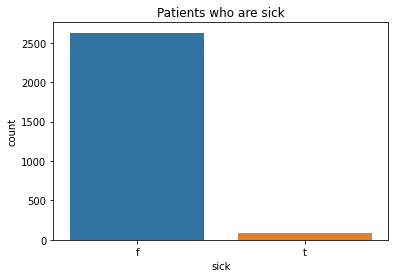

In [ ]:
#Count plots
sns.countplot(x='sick',data=hypo)
plt.title('Patients who are sick')
plt.show()

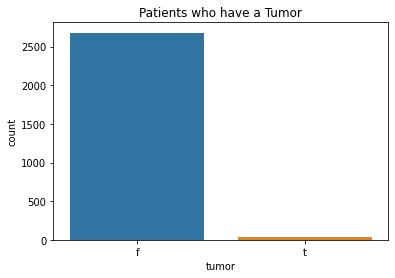

In [ ]:
#Count plots
sns.countplot(x='tumor',data=hypo)
plt.title('Patients who have a Tumor')
plt.show()

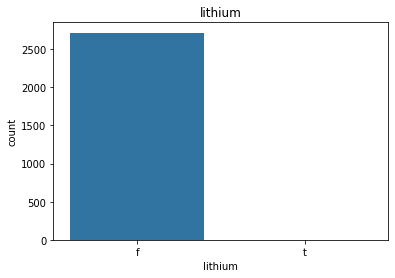

In [ ]:
#Count plots
sns.countplot(x='lithium',data=hypo)
plt.title('lithium')
plt.show()

In [ ]:
#numerical lithium count
hypo.lithium.value_counts()

f    2715
t       2
Name: lithium, dtype: int64

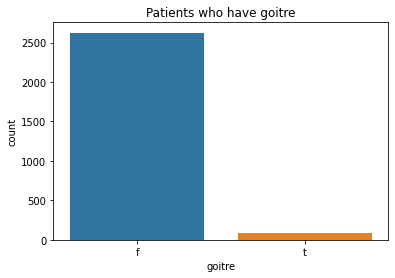

In [ ]:
#Count plots
sns.countplot(x='goitre',data=hypo)
plt.title('Patients who have goitre')
plt.show()

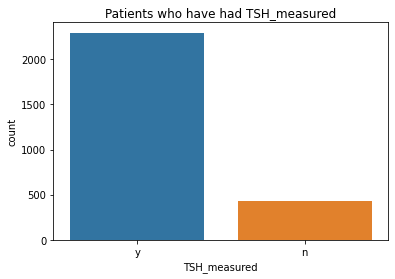

In [ ]:
#Count plots
sns.countplot(x='TSH_measured',data=hypo)
plt.title('Patients who have had TSH_measured')
plt.show()

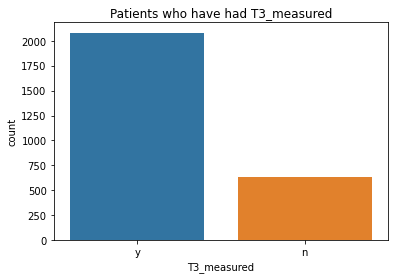

In [ ]:
#Count plots
sns.countplot(x='T3_measured',data=hypo)
plt.title('Patients who have had T3_measured')
plt.show()

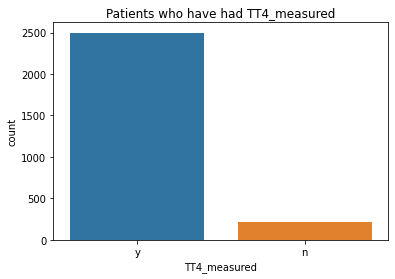

In [ ]:
#Count plots
sns.countplot(x='TT4_measured',data=hypo)
plt.title('Patients who have had TT4_measured')
plt.show()

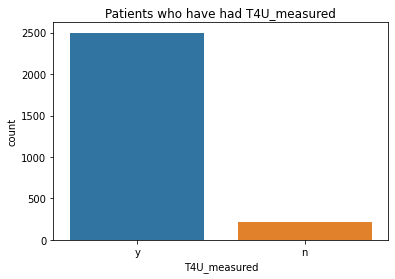

In [ ]:
#Count plots
sns.countplot(x='T4U_measured',data=hypo)
plt.title('Patients who have had T4U_measured')
plt.show()

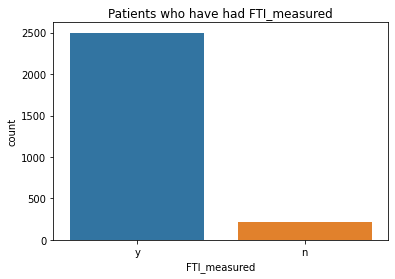

In [ ]:
#Count plots
sns.countplot(x='FTI_measured',data=hypo)
plt.title('Patients who have had FTI_measured')
plt.show()

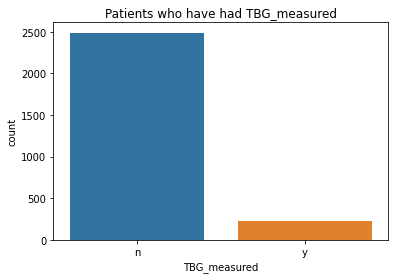

In [ ]:
#Count plots
sns.countplot(x='TBG_measured',data=hypo)
plt.title('Patients who have had TBG_measured')
plt.show()

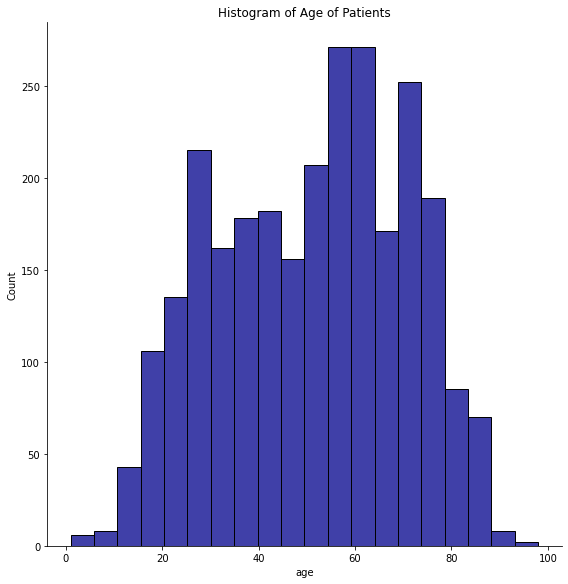

In [ ]:
#Histogram of Age
sns.displot(hypo['age'], bins=20, height=8,color='darkblue')
plt.title('Histogram of Age of Patients')
plt.show()

> Majority of the patients are 55-65 years of age

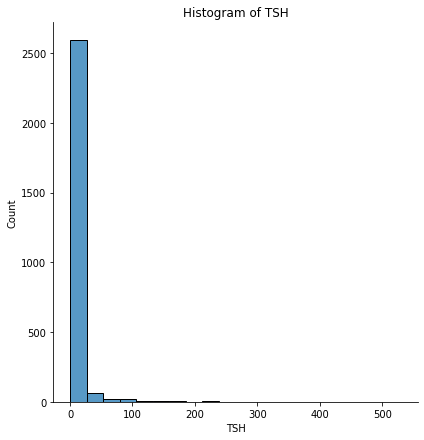

In [ ]:
#Histogram of TSH
sns.displot(hypo['TSH'], bins=20, height=6)
plt.title('Histogram of TSH')
plt.show()


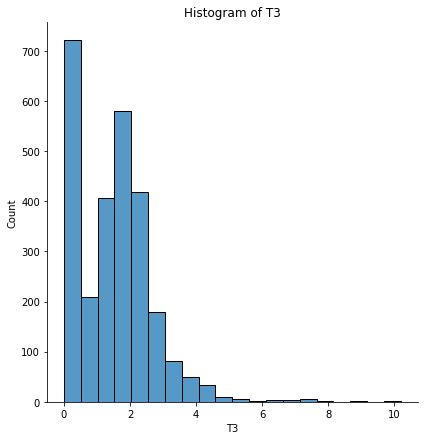

In [ ]:
#Histogram of T3
sns.displot(hypo['T3'], bins=20, height=6)
plt.title('Histogram of T3')
plt.show()

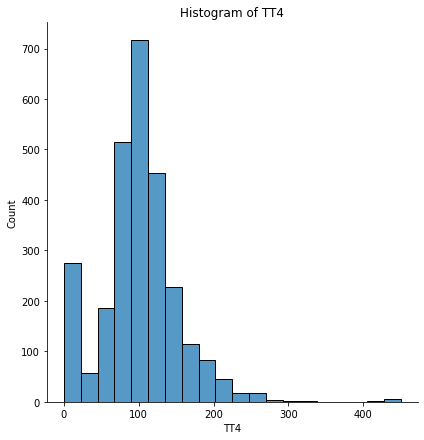

In [ ]:
#Histogram of TT4
sns.displot(hypo['TT4'], bins=20, height=6)
plt.title('Histogram of TT4')
plt.show()

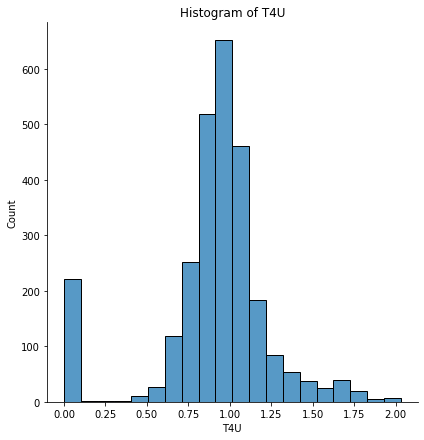

In [ ]:
#Histogram of T4U
sns.displot(hypo['T4U'], bins=20, height=6)
plt.title('Histogram of T4U')
plt.show()

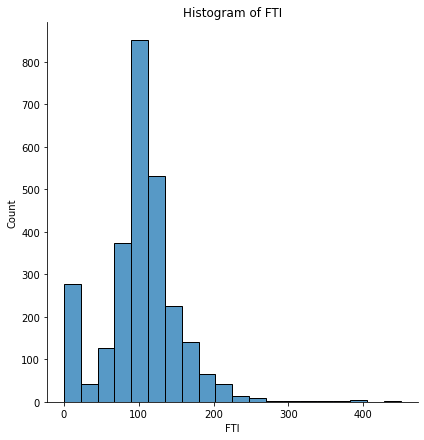

In [ ]:
#Histogram of FTI
sns.displot(hypo['FTI'], bins=20, height=6)
plt.title('Histogram of FTI')
plt.show()

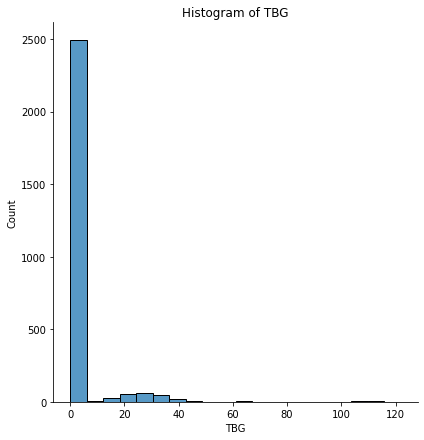

In [ ]:
#Histogram of TBG
sns.displot(hypo['TBG'], bins=20, height=6)
plt.title('Histogram of TBG')
plt.show()

As can be observed from the numerical data, except Age all the others are mostly positively skewed to varying degrees. Meaning most of the data does not follow a normal distribution.

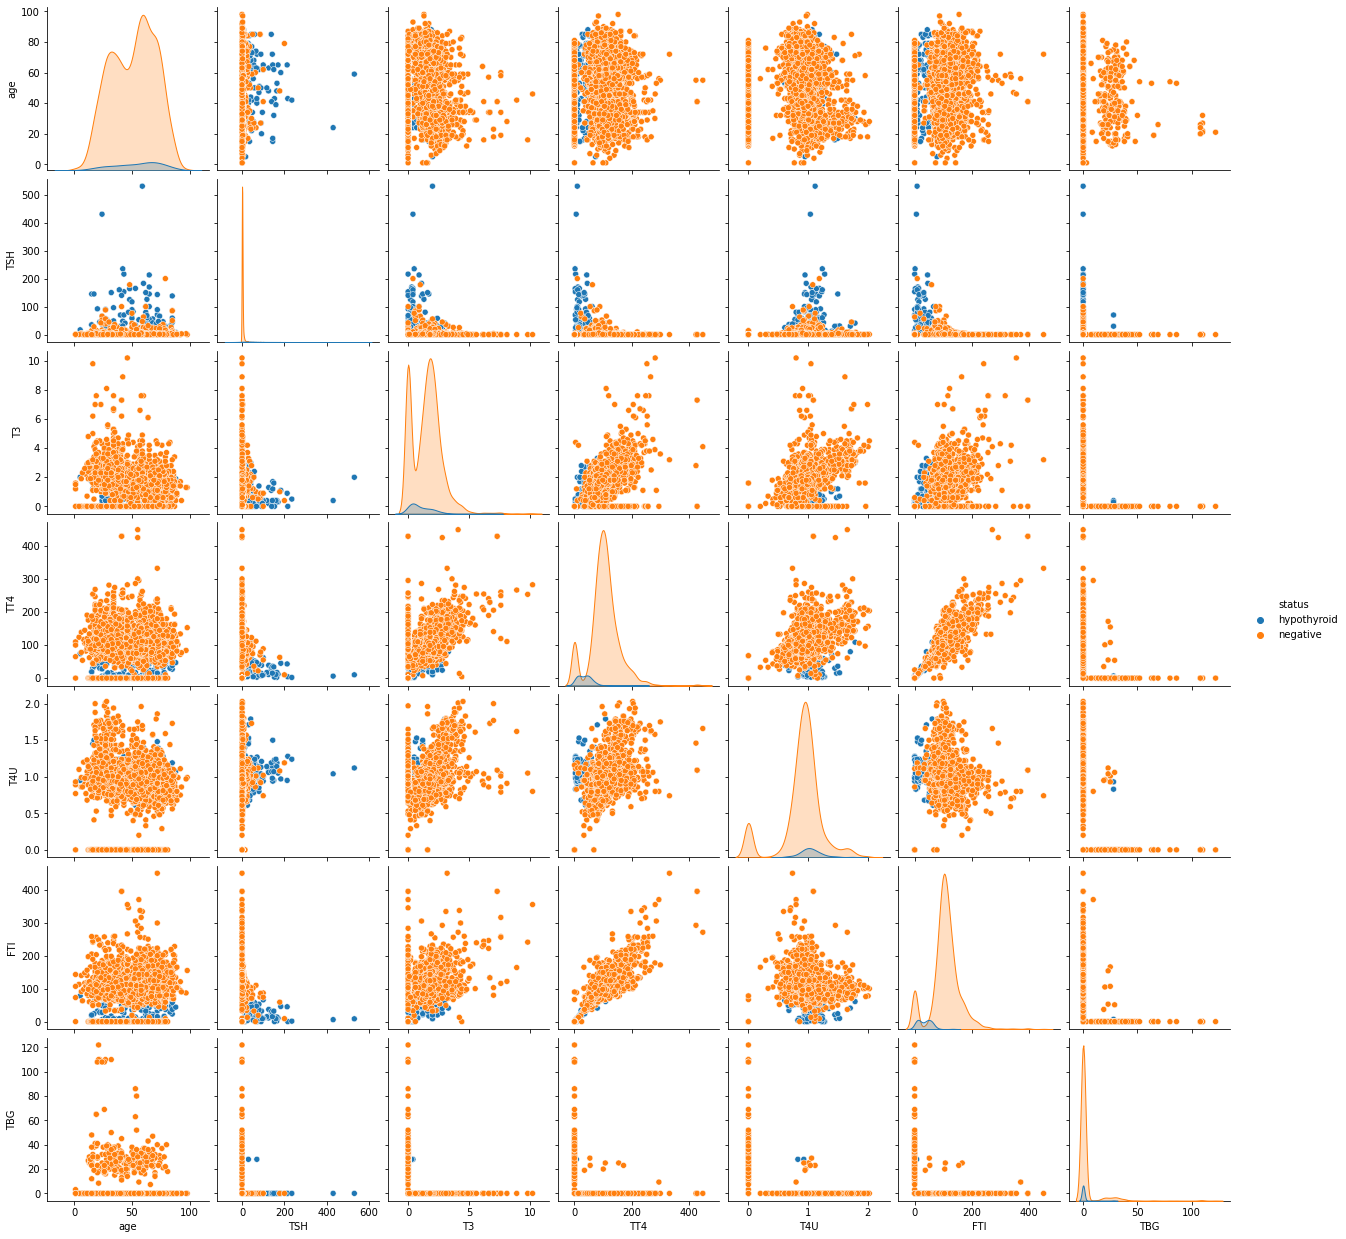

In [ ]:
#bivariate summaries

sns.pairplot(hypo, hue='status')
plt.show()

In [ ]:
#Correlations
hypo.corr()


,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,0.012610,-0.084571,-0.005598,-0.030446,0.099622,-0.141482
TSH,0.012610,1.000000,-0.084577,-0.223719,0.090902,-0.245114,-0.053627
T3,-0.084571,-0.084577,1.000000,0.500078,0.477122,0.376448,-0.314526
TT4,-0.005598,-0.223719,0.500078,1.000000,0.630195,0.883536,-0.469416
T4U,-0.030446,0.090902,0.477122,0.630195,1.000000,0.383316,-0.650825
FTI,0.099622,-0.245114,0.376448,0.883536,0.383316,1.000000,-0.495770
TBG,-0.141482,-0.053627,-0.314526,-0.469416,-0.650825,-0.495770,1.000000


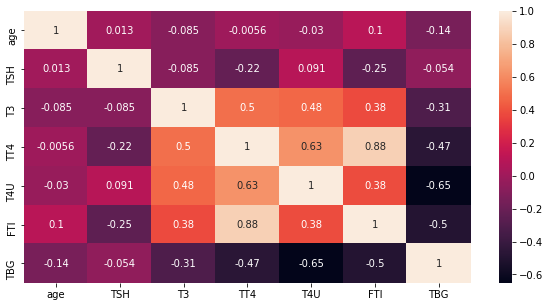

In [ ]:
#correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(hypo.corr(),annot=True)
plt.show()

> It can be seen that TT4 and FTI are highly positively corelated, followed by TT4 and T4U which have an above than average positive corelation which may affect the model created, depending on choice of model. TBG and T4U have an above than average negative corelation.

# Checking Multicollinearity

In [ ]:
#multicollinearity test

# Remove the binnedinc, state, target_deathrate columns, we want to focus on our independent variables only.
hypo_c = hypo[['age', 'TSH', 'T3', 'TT4', 'T4U','FTI', 'TBG']]

# Let's display the correlations between the variables
correlations = hypo_c.corr()

correlations

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,0.012610,-0.084571,-0.005598,-0.030446,0.099622,-0.141482
TSH,0.012610,1.000000,-0.084577,-0.223719,0.090902,-0.245114,-0.053627
T3,-0.084571,-0.084577,1.000000,0.500078,0.477122,0.376448,-0.314526
TT4,-0.005598,-0.223719,0.500078,1.000000,0.630195,0.883536,-0.469416
T4U,-0.030446,0.090902,0.477122,0.630195,1.000000,0.383316,-0.650825
FTI,0.099622,-0.245114,0.376448,0.883536,0.383316,1.000000,-0.495770
TBG,-0.141482,-0.053627,-0.314526,-0.469416,-0.650825,-0.495770,1.000000


In [ ]:
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.076123,-0.009414,0.098128,0.411583,-0.003407,-0.429027,0.160899
TSH,-0.009414,1.166917,0.053622,0.652394,-0.495768,-0.118017,0.003189
T3,0.098128,0.053622,1.431418,-0.587915,-0.343566,0.131912,0.032797
TT4,0.411583,0.652394,-0.587915,12.156526,-5.529590,-9.654395,-2.770380
T4U,-0.003407,-0.495768,-0.343566,-5.529590,4.604392,4.323199,2.409157
FTI,-0.429027,-0.118017,0.131912,-9.654395,4.323199,9.244716,2.839429
TBG,0.160899,0.003189,0.032797,-2.770380,2.409157,2.839429,2.708433


> The dataset features have an acceptable range of multicollinearity except TT4 and FTI. Ideally dropping may reduce VIF score of FTI. But since the methods/models chosen are not adversely affected by this we can leave the features.

# Implementing the Solution

## Decision Tree

In [ ]:
#dropping remaining nulls in order to model
hypo.dropna(axis=0, inplace=True)

In [ ]:
#Encoding the categories
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hypo['status'] = le.fit_transform(hypo['status'])
hypo['sex'] = le.fit_transform(hypo['sex'])
hypo['on_thyroxine'] = le.fit_transform(hypo['on_thyroxine'])
hypo['query_on_thyroxine'] = le.fit_transform(hypo['query_on_thyroxine'])
hypo['on_antithyroid_medication'] = le.fit_transform(hypo['on_antithyroid_medication'])
hypo['thyroid_surgery'] = le.fit_transform(hypo['thyroid_surgery'])
hypo['query_hypothyroid'] = le.fit_transform(hypo['query_hypothyroid'])
hypo['query_hyperthyroid'] = le.fit_transform(hypo['query_hyperthyroid'])
hypo['pregnant'] = le.fit_transform(hypo['pregnant'])
hypo['sick'] = le.fit_transform(hypo['sick'])
hypo['tumor'] = le.fit_transform(hypo['tumor'])
hypo['lithium'] = le.fit_transform(hypo['lithium'])
hypo['goitre'] = le.fit_transform(hypo['goitre'])
hypo['TSH_measured'] = le.fit_transform(hypo['TSH_measured'])
hypo['T3_measured'] = le.fit_transform(hypo['T3_measured'])
hypo['TT4_measured'] = le.fit_transform(hypo['TT4_measured'])
hypo['T4U_measured'] = le.fit_transform(hypo['T4U_measured'])
hypo['FTI_measured'] = le.fit_transform(hypo['FTI_measured'])
hypo['TBG_measured'] = le.fit_transform(hypo['TBG_measured'])



In [ ]:
# Separating the target from our data
feat = (hypo.drop(['status'],axis=1)).columns
X = hypo.drop(['status'],axis=1)
y = hypo['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Gradient Boost

Training the Gradient Boosted model

In [ ]:
#creating model

gbc = GradientBoostingClassifier(random_state=0)
gbc = gbc.fit(X_train, y_train)

y_pred_gtrain = gbc.predict(X_train)
y_pred_gbc = gbc.predict(X_test)


In [ ]:
# Model Accuracy
from sklearn import metrics

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_gtrain))
print('R-squared train:',r2_score(y_train, y_pred_gtrain))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_gtrain))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred_gbc))
print('R-squared test:',r2_score(y_test, y_pred_gbc))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred_gbc))
print('\n')
print(classification_report(y_test,y_pred_gbc))


Accuracy Score train:  0.9986194201564658
R-squared train: 0.9710235758480905
Mean Squared Error train: 0.0013805798435342844


********************


Accuracy Score test:  0.9908088235294118
R-squared test: 0.8051436349308689
Mean Squared Error test: 0.009191176470588236


              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.99      1.00      1.00       517

    accuracy                           0.99       544
   macro avg       0.96      0.94      0.95       544
weighted avg       0.99      0.99      0.99       544



>GradientBoost Classifier has an impressive 97% R-squared on training data but 80% on test data which points to Overfitting. It also an equally impressive precision,recall and F1-score but we know the classes are very imbalanced as we saw in the EDA. Introducing a scaling parameter to cater for this:

In [ ]:
#GradientBoosting hyperparameter tuning

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#creating the weighting/scale of the classes(Hypothyroid or Negative in status per value counts)
print(hypo.status.value_counts())
sweight=122/1890
print(sweight)

#creating a weights array
sample_weights = np.zeros(len(y_train))

#weighting the data (hypothyroid = 0, negative=1)
sample_weights[y_train == 0] = 1
sample_weights[y_train == 1] = 0.065

#model
gbc_tune = GradientBoostingClassifier(random_state=0)

# define search space
params = dict()
params['loss'] = ['deviance',' exponential']
params['learning_rate'] = (1e-6, 100.0, 'log-uniform')
params['max_depth'] = (3,8)
params['n_estimators'] = (100,300,50)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# define the search
search = GridSearchCV(gbc_tune, params, n_jobs=-1, cv=cv, verbose=1)

# perform the search
search.fit(X_train, y_train,sample_weight = sample_weights)

# report the best result
print(search.best_score_)
print(search.best_params_)


1    2581
0     136
Name: status, dtype: int64
0.06455026455026455
Fitting 30 folds for each of 36 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 209 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.2min finished


0.9898751391648699
{'learning_rate': 100.0, 'loss': 'deviance', 'max_depth': 8, 'n_estimators': 100}


In [ ]:
#predict
y_pred_tuned = search.predict(X_train)
y_pred = search.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 23   4]
 [  2 515]]


In [ ]:
# Model Accuracy
from sklearn import metrics

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_tuned))
print('R-squared train:',r2_score(y_train, y_pred_tuned))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_tuned))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred_gbc))


Accuracy Score train:  0.9990796134376438
R-squared train: 0.980682383898727
Mean Squared Error train: 0.0009203865623561896


********************


Accuracy Score test:  0.9889705882352942
R-squared test: 0.7661723619170429
Mean Squared Error test: 0.011029411764705883


              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.99      1.00      1.00       517

    accuracy                           0.99       544
   macro avg       0.96      0.94      0.95       544
weighted avg       0.99      0.99      0.99       544



> As can be seen, the accuracy increases by about 1% on training data but drops by 4% on test data which points to Overfitting and the effect of class imbalance. GridSearch didn't yield optimal parameters thus the default GradientBoost performs better and does not suffer as much overfitting.

In [ ]:
#Manually tuning the model
#creating a weights array
sample_weights = np.zeros(len(y_train))

#weighting the data (hypothyroid = 0, negative=1)
sample_weights[y_train == 0] = 1
sample_weights[y_train == 1] = 0.053


gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=5, n_estimators=1)
gbc = gbc.fit(X_train, y_train, sample_weight=sample_weights)

y_pred_gtrain = gbc.predict(X_train)
y_pred_gbc = gbc.predict(X_test)

# Model Accuracy
from sklearn import metrics

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_gtrain))
print('R-squared train:',r2_score(y_train, y_pred_gtrain))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_gtrain))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred_gbc))
print('R-squared test:',r2_score(y_test, y_pred_gbc))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred_gbc))
print('\n')
print(classification_report(y_test,y_pred_gbc))

Accuracy Score train:  0.9944776806258628
R-squared train: 0.8840943033923618
Mean Squared Error train: 0.005522319374137137


********************


Accuracy Score test:  0.9871323529411765
R-squared test: 0.7272010889032166
Mean Squared Error test: 0.012867647058823529


              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.99      0.99      0.99       517

    accuracy                           0.99       544
   macro avg       0.93      0.94      0.93       544
weighted avg       0.99      0.99      0.99       544



>Through an iterative process of manually altering the hyperparameters.
The learning_rate=0.01, max_depth=5, n_estimators=1 and sample weighting to account for class imbalance were found to reduce Overfitting drastically. The difference in R-squared between trained and test data was 16%. The default model had a higher R-squared for both the test and train but the difference between train and test was 22%.

In [ ]:
# Get numerical feature importances
importances = list(gbc.feature_importances_)

# Connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feat, importances)]

#Showing the info(in one line)
print(feature_importances)
print()

#Sort the values in descending order 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.81), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.02), ('FTI_measured', 0.0), ('FTI', 0.11), ('TBG_measured', 0.03), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.81
Variable: FTI                  Importance: 0.11
Variable: TBG_measured         Importance: 0.03
Variable: T4U                  Importance: 0.02
Variable: age                  Importance: 0.01
Variable: on_thyroxine         Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Varia

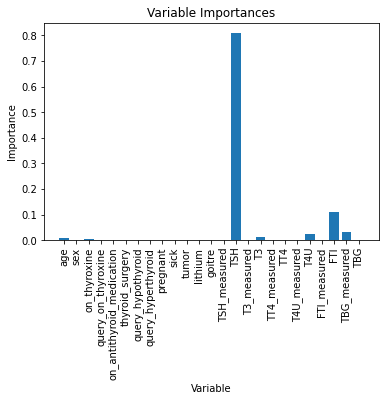

In [ ]:
#Plotting feature importances for Gradient Boosted Trees
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feat, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


> In GradientBoosted classifier, as observed above it can focus on particular features giving them more weighting while ignoring others. TSH alone accounts for 80% importance and FTI 10% meaning only this 2 features can account for 90% of the classes.

### Random Forest

Training the Random Forest model

In [ ]:
#instantiate the model 
forest = RandomForestClassifier(random_state=0)

# Train it on our training set.
forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_ftrain = forest.predict(X_train)
y_pred = forest.predict(X_test)


print("Accuracy Score train: ",accuracy_score(y_train, y_pred_ftrain))
print('R-squared train:',r2_score(y_train, y_pred_ftrain))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_ftrain))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score train:  1.0
R-squared train: 1.0
Mean Squared Error train: 0.0


********************


Accuracy Score test:  0.9908088235294118
R-squared test: 0.8051436349308689
Mean Squared Error test: 0.009191176470588236


              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.99      1.00      1.00       517

    accuracy                           0.99       544
   macro avg       0.96      0.94      0.95       544
weighted avg       0.99      0.99      0.99       544



In [ ]:
#Manually optimizing the model
#The class are imbalanced though so let as introduce class weighting on top of the already default bootstrapping
 #instantiate the model 

forest = RandomForestClassifier(n_estimators=5, max_depth=6,class_weight='balanced_subsample', random_state=0)

# Train it on our training set.
forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_ftrain = forest.predict(X_train)
y_pred = forest.predict(X_test)


print("Accuracy Score train: ",accuracy_score(y_train, y_pred_ftrain))
print('R-squared train:',r2_score(y_train, y_pred_ftrain))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_ftrain))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))


Accuracy Score train:  0.9907961343764381
R-squared train: 0.8068238389872697
Mean Squared Error train: 0.009203865623561895


********************


Accuracy Score test:  0.9889705882352942
R-squared test: 0.7661723619170429
Mean Squared Error test: 0.011029411764705883


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.99      0.99      0.99       517

    accuracy                           0.99       544
   macro avg       0.94      0.94      0.94       544
weighted avg       0.99      0.99      0.99       544



>Through an iterative process of manually altering the hyperparameters.
The n_estimators=5, max_depth=6 and introduction of class weighting were found to reduce Overfitting drastically. The difference in R-squared between trained and test data was only 4% while maintaining an average R-squared of close 80%. This was unachievable with the default model which Overfitted the data. Though, it is important to note that the R-squared decreased by about 4% on the test set but this was balanced out by the fact that the difference between the R-squared of the training set and test set also decreased by an impressive 16%. This model is thus more generalized. It outperformed GradientBoost due to sample weighting which reduced the initial high R-squared GradientBoost had achieved.

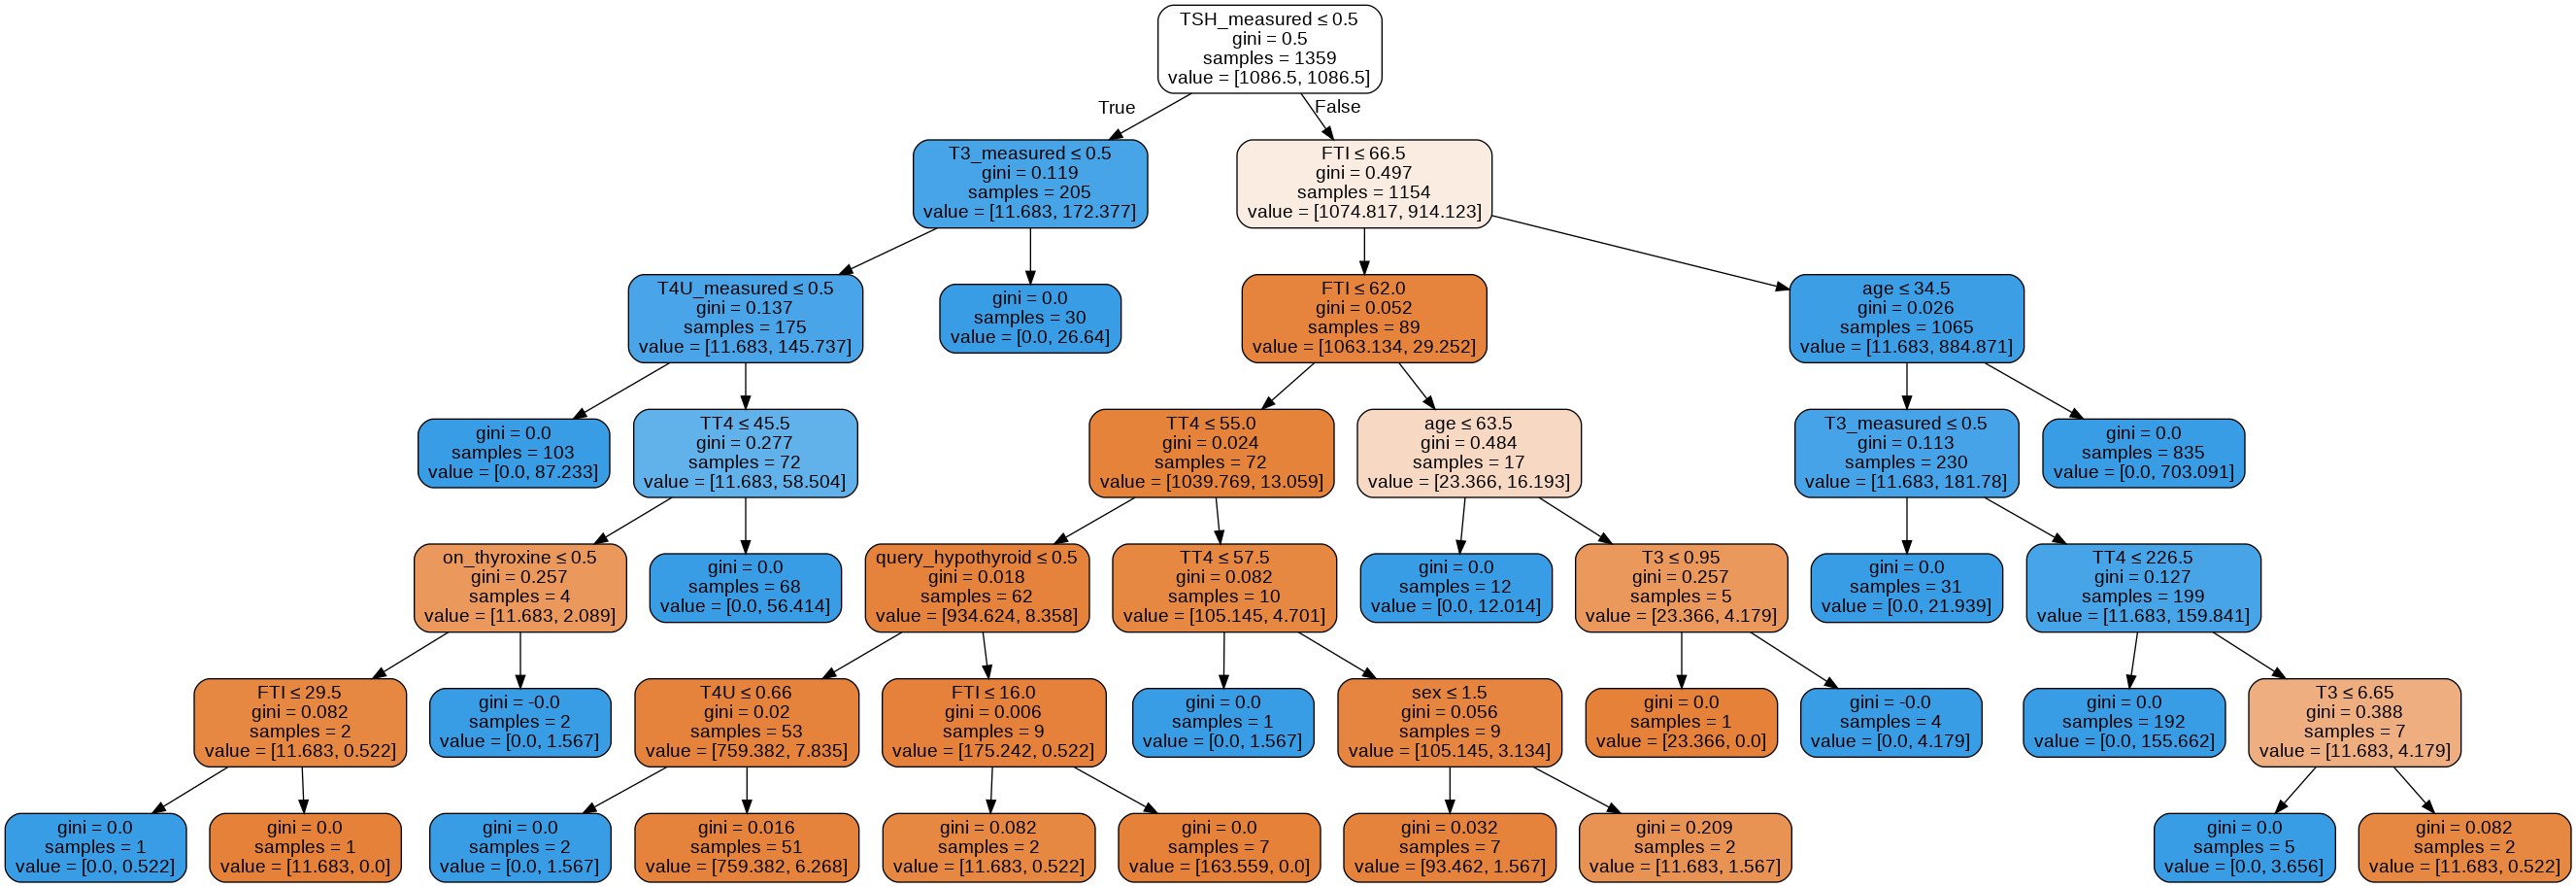

In [ ]:
#Visualize a random tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[2]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Feature Importance

In [ ]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# Connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feat, importances)]

#Showing the info(in one line)
print(feature_importances)
print()

#Sort the values in descending order 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.02), ('TSH', 0.37), ('T3_measured', 0.01), ('T3', 0.05), ('TT4_measured', 0.0), ('TT4', 0.12), ('T4U_measured', 0.0), ('T4U', 0.01), ('FTI_measured', 0.0), ('FTI', 0.36), ('TBG_measured', 0.01), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.37
Variable: FTI                  Importance: 0.36
Variable: TT4                  Importance: 0.12
Variable: T3                   Importance: 0.05
Variable: age                  Importance: 0.02
Variable: TSH_measured         Importance: 0.02
Variable: on_thyroxine         Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: T3_measured          Importance: 0.01
Variable: T4U                  Importance: 0.01
Var

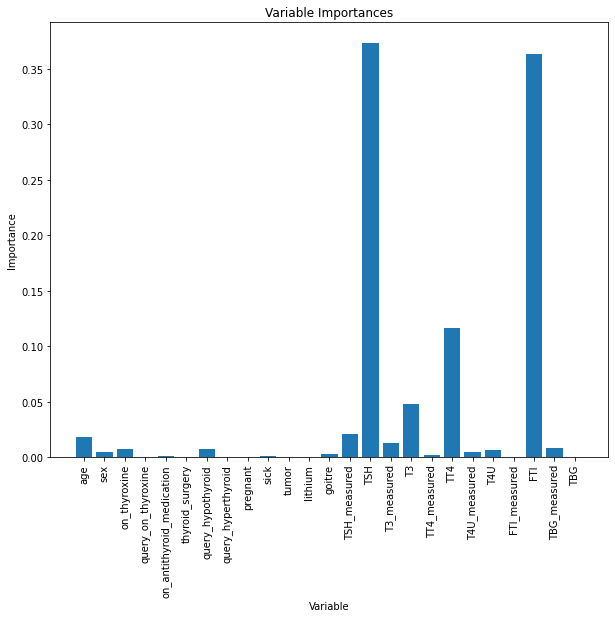

In [ ]:
#Plotting the above 
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.figure(figsize=(10,8))
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feat, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


>The most important features were found to be TSH and FTI, which both accounted for 70% of the variance. The benefit of Random Forest is that it doesn't give too much weight/importance to a feature which one can contrast with Gradient boost which had TSH at 60% importance. Additionally since each decision tree is constructed from a bootstrap sample (e.g. random selection with replacement), the class distribution in the data sample will be different for each tree. We went a step further and added class weighting based on the class distribution in each bootstrap sample, instead of the entire training dataset.

### AdaBoost

In [ ]:
#Creating AdaBoost Classifier
ada_boost = AdaBoostClassifier(random_state=0)


ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada_train = ada_boost.predict(X_train)
y_pred_ada = ada_boost.predict(X_test)



In [ ]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_ada_train))
print('R-squared train:',r2_score(y_train, y_pred_ada_train))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_ada_train))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred_ada))
print('R-squared test:',r2_score(y_test, y_pred_ada))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred_ada))
print('\n')
print(classification_report(y_test,y_pred_ada))


Accuracy Score train:  0.9953980671882191
R-squared train: 0.9034119194936349
Mean Squared Error train: 0.004601932811780948


********************


Accuracy Score test:  0.9926470588235294
R-squared test: 0.8441149079446952
Mean Squared Error test: 0.007352941176470588


              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.99      1.00      1.00       517

    accuracy                           0.99       544
   macro avg       0.98      0.94      0.96       544
weighted avg       0.99      0.99      0.99       544



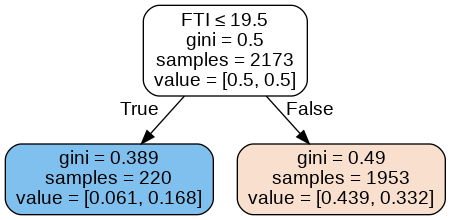

In [ ]:
#Visualize a random tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the adaboost tree estimators
tree = ada_boost.estimators_[25]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Feature Importance

In [ ]:
# Get numerical feature importances
importances = list(ada_boost.feature_importances_)

# Connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feat, importances)]

#Showing the info(in one line)
print(feature_importances)
print()

#Sort the values in descending order 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.16), ('sex', 0.0), ('on_thyroxine', 0.02), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.02), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.38), ('T3_measured', 0.0), ('T3', 0.08), ('TT4_measured', 0.0), ('TT4', 0.08), ('T4U_measured', 0.0), ('T4U', 0.1), ('FTI_measured', 0.0), ('FTI', 0.14), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.38
Variable: age                  Importance: 0.16
Variable: FTI                  Importance: 0.14
Variable: T4U                  Importance: 0.1
Variable: T3                   Importance: 0.08
Variable: TT4                  Importance: 0.08
Variable: on_thyroxine         Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.02
Variable: query_hypothyroid    Importance: 0.02
Variable: sex                  Importance: 0.0
Var

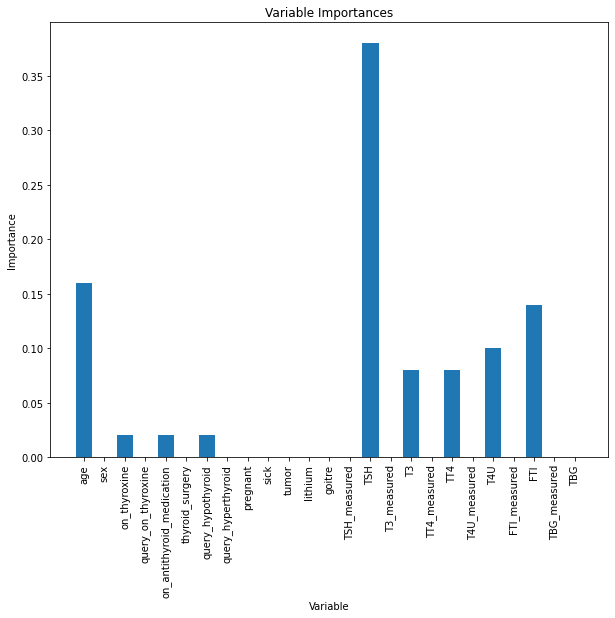

In [ ]:
#Plotting feature importance
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.figure(figsize=(10,8))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feat, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


>It's important to note that AdaBoost corrects itself (penalizes and weights stumps) for misclassification but not imbalance in the dataset. Meaning that though we see an improved R-squared this should be taken with caution for the class imbalance has not been taken into consideration. Though looking at the precision and recall metrics show that so far this is the best model.

### XGBoost

In [ ]:
#creating xgboost default model
import xgboost as xgb
from xgboost import XGBClassifier


classifier = XGBClassifier(random_state=0)
classifier.fit(X_train, y_train)


#Predict
y_pred_xgb = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_xgb))
print('R-squared train:',r2_score(y_train, y_pred_xgb))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_xgb))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))


Accuracy Score train:  0.9953980671882191
R-squared train: 0.9034119194936349
Mean Squared Error train: 0.004601932811780948


********************


Accuracy Score test:  0.9908088235294118
R-squared test: 0.8051436349308689
Mean Squared Error test: 0.009191176470588236


              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.99      1.00      1.00       517

    accuracy                           0.99       544
   macro avg       0.96      0.94      0.95       544
weighted avg       0.99      0.99      0.99       544



>XGBoost is comparable to AdaBoost in a high R-square on the dataset but on the test set it slightly underperforms pointing to possible ovverfitting. It's precision and recall and f1-scre is good. Introducing a scaling parameter to cater for this:

In [ ]:
# Get numerical feature importances
importances = list(classifier.feature_importances_)

# Connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feat, importances)]

#Showing the info(in one line)
print(feature_importances)
print()

#Sort the values in descending order 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.03), ('sex', 0.02), ('on_thyroxine', 0.05), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.02), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.42), ('T3_measured', 0.0), ('T3', 0.02), ('TT4_measured', 0.0), ('TT4', 0.04), ('T4U_measured', 0.0), ('T4U', 0.03), ('FTI_measured', 0.0), ('FTI', 0.25), ('TBG_measured', 0.05), ('TBG', 0.07)]

Variable: TSH                  Importance: 0.41999998688697815
Variable: FTI                  Importance: 0.25
Variable: TBG                  Importance: 0.07000000029802322
Variable: on_thyroxine         Importance: 0.05000000074505806
Variable: TBG_measured         Importance: 0.05000000074505806
Variable: TT4                  Importance: 0.03999999910593033
Variable: age                  Importance: 0.029999999329447746
Variable: T4U                  Importance: 0.02999999932

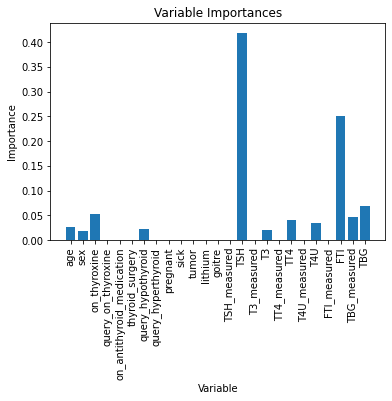

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feat, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


### CatBoost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

#Predict
y_pred_cat = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

Learning rate set to 0.01435
0:	learn: 0.6495132	total: 51.8ms	remaining: 51.7s
1:	learn: 0.6157058	total: 54.8ms	remaining: 27.3s
2:	learn: 0.5845828	total: 57.7ms	remaining: 19.2s
3:	learn: 0.5485675	total: 60.5ms	remaining: 15.1s
4:	learn: 0.5228097	total: 63.3ms	remaining: 12.6s
5:	learn: 0.4959470	total: 66.1ms	remaining: 11s
6:	learn: 0.4704017	total: 68.9ms	remaining: 9.78s
7:	learn: 0.4534106	total: 72.4ms	remaining: 8.98s
8:	learn: 0.4259253	total: 75.8ms	remaining: 8.34s
9:	learn: 0.4053180	total: 78.6ms	remaining: 7.78s
10:	learn: 0.3810575	total: 82.5ms	remaining: 7.42s
11:	learn: 0.3600615	total: 86ms	remaining: 7.08s
12:	learn: 0.3450646	total: 89.2ms	remaining: 6.77s
13:	learn: 0.3260996	total: 92.5ms	remaining: 6.51s
14:	learn: 0.3078575	total: 96.2ms	remaining: 6.32s
15:	learn: 0.2887927	total: 99.2ms	remaining: 6.1s
16:	learn: 0.2773259	total: 102ms	remaining: 5.9s
17:	learn: 0.2623340	total: 105ms	remaining: 5.72s
18:	learn: 0.2488948	total: 108ms	remaining: 5.57s
19

In [ ]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_cat))
print('R-squared train:',r2_score(y_train, y_pred_cat))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_cat))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))


Accuracy Score train:  0.9990796134376438
R-squared train: 0.980682383898727
Mean Squared Error train: 0.0009203865623561896


********************


Accuracy Score test:  0.9926470588235294
R-squared test: 0.8441149079446952
Mean Squared Error test: 0.007352941176470588


              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.99      1.00      1.00       517

    accuracy                           0.99       544
   macro avg       0.98      0.94      0.96       544
weighted avg       0.99      0.99      0.99       544



In [ ]:
# Get numerical feature importances
importances = list(classifier.feature_importances_)

# Connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feat, importances)]

#Showing the info(in one line)
print(feature_importances)
print()

#Sort the values in descending order 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 5.74), ('sex', 1.35), ('on_thyroxine', 8.33), ('query_on_thyroxine', 0.09), ('on_antithyroid_medication', 1.5), ('thyroid_surgery', 0.38), ('query_hypothyroid', 3.62), ('query_hyperthyroid', 0.02), ('pregnant', 0.07), ('sick', 0.38), ('tumor', 0.1), ('lithium', 0.0), ('goitre', 0.08), ('TSH_measured', 0.41), ('TSH', 23.34), ('T3_measured', 1.11), ('T3', 7.58), ('TT4_measured', 0.37), ('TT4', 8.94), ('T4U_measured', 0.27), ('T4U', 9.47), ('FTI_measured', 0.69), ('FTI', 25.12), ('TBG_measured', 0.25), ('TBG', 0.78)]

Variable: FTI                  Importance: 25.12
Variable: TSH                  Importance: 23.34
Variable: T4U                  Importance: 9.47
Variable: TT4                  Importance: 8.94
Variable: on_thyroxine         Importance: 8.33
Variable: T3                   Importance: 7.58
Variable: age                  Importance: 5.74
Variable: query_hypothyroid    Importance: 3.62
Variable: on_antithyroid_medication Importance: 1.5
Variable: sex                  I

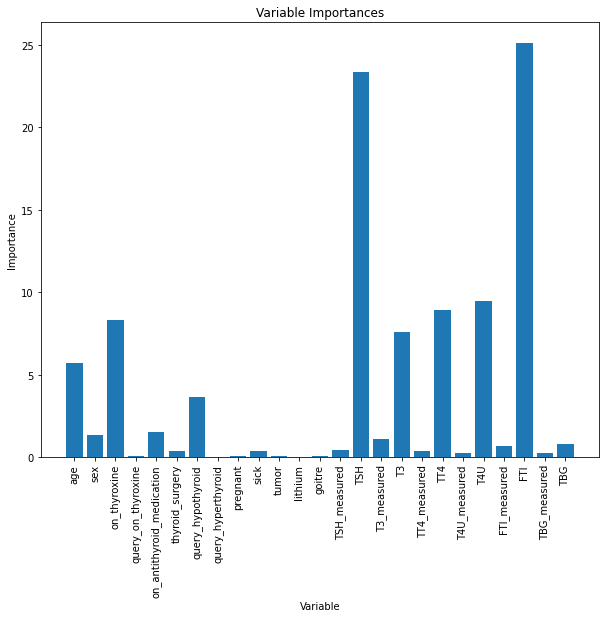

In [ ]:
#Plot the above
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.figure(figsize=(10,8))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feat, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


>In summary, the best performing model was AdaBoost. It is interesting to note how the different models gave different ranges of importance to the features. Random Forest feature importance was given more credence because of the stochastic nature of the model. The most important features can be said to be TSH (shown in all the models) followed by  FTI arguably.

## Feature Engineering

Additional Cleaning of the data

In [ ]:
#replace the ? in gender with the mode value
m = hypo.sex.mode() #which is 1 for female
hypo.sex = hypo.sex.replace(0,1)

Binning the measurement columns

In [ ]:
#creating a copy to engineer features
hypo_eng = hypo.copy(deep=True)

In [ ]:
#Binning TSH
quantile_list =  [0.25,0.5, 0.75, 1.0]
quantiles = hypo_eng['TSH'].quantile(quantile_list)

quantile_labels = [0, 1, 2]
hypo_eng['TSH_label'] = pd.qcut( hypo_eng['TSH'], q=quantile_list,labels=quantile_labels)


#Bin for FTI
quantile_list =  [0,0.25,0.5, 0.75, 1.0]
quantiles = hypo_eng['FTI'].quantile(quantile_list)

quantile_labelsf = [1,2,3,4]
hypo_eng['FTI_label'] = pd.qcut( hypo_eng['FTI'], q=quantile_list,labels=quantile_labelsf)


#Binning T3
quantile_list =  [0,0.25,0.5, 0.75, 1.0]
quantiles = hypo_eng['T3'].quantile(quantile_list)

quantile_labels = [1, 2,3,4]
hypo_eng['T3_label'] = pd.qcut( hypo_eng['T3'], q=quantile_list,labels=quantile_labels)


#Bin for TT4
quantile_list =  [0,0.25,0.5, 0.75, 1.0]
quantiles = hypo_eng['TT4'].quantile(quantile_list)

quantile_labelsf = [1,2,3,4]
hypo_eng['TT4_label'] = pd.qcut( hypo_eng['TT4'], q=quantile_list,labels=quantile_labelsf)


#Bin for T4U
quantile_list =  [0,0.25,0.5, 0.75, 1.0]
quantiles = hypo_eng['T4U'].quantile(quantile_list)

quantile_labelsf = [1,2,3,4]
hypo_eng['T4U_label'] = pd.qcut( hypo_eng['T4U'], q=quantile_list,labels=quantile_labelsf)


#Bin for TBG
quantile_list =  [0,0.25,0.5, 0.75, 1.0]
quantiles = hypo_eng['TBG'].quantile(quantile_list)

quantile_labelsf = [1]
hypo_eng['TBG_label'] = pd.qcut( hypo_eng['TBG'], q=quantile_list,labels=quantile_labelsf, duplicates='drop')



> Using FTI and TSH as the 2 features to pick the best SVM model since they explained much of the variance in the Random Forest model.

### Linear SVM

Splitting the dataset into the Training set and Test set

In [ ]:
hypo_s = hypo_eng[['FTI','TSH','FTI_label','TSH_label','status']]

In [ ]:
# Seperating the target from our data
feat = (hypo_s[['FTI','TSH']]).columns
X = hypo_s[['FTI','TSH']]
y = hypo_s['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

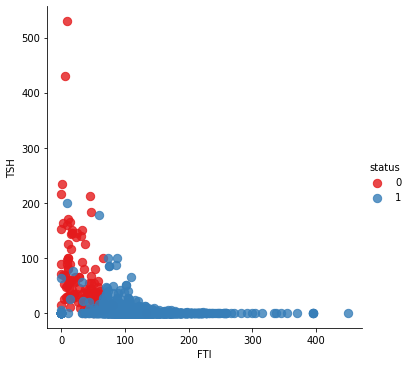

In [ ]:
# Plot two features
sns.lmplot(x='FTI', y= 'TSH', data=hypo, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.show()

Feature Scaling (Transformation)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the SVM model

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

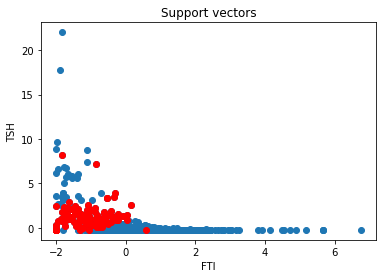

In [ ]:
# Get support vectors themselves
support_vectors = classifier.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Support vectors')
plt.xlabel('FTI')
plt.ylabel('TSH')
plt.show()

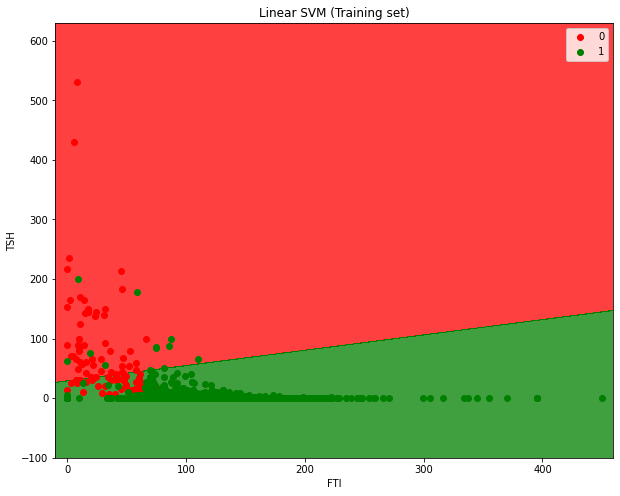

In [ ]:
#Viz of linear SVM model
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 100, stop = X_set[:, 1].max() + 100, step = 0.25))
plt.figure(figsize=(10,8))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Linear SVM (Training set)')
plt.xlabel('FTI')
plt.ylabel('TSH')
plt.legend()
plt.show()

Predicting the Test set results

In [ ]:
y_pred_lsvm = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 11  16]
 [  1 516]]


In [ ]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_lsvm))
print('R-squared train:',r2_score(y_train, y_pred_lsvm))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_lsvm))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))


Accuracy Score train:  0.9691670501610676
R-squared train: 0.35285986060735375
Mean Squared Error train: 0.030832949838932353


********************


Accuracy Score test:  0.96875
R-squared test: 0.33748835876495464
Mean Squared Error test: 0.03125


              precision    recall  f1-score   support

           0       0.92      0.41      0.56        27
           1       0.97      1.00      0.98       517

    accuracy                           0.97       544
   macro avg       0.94      0.70      0.77       544
weighted avg       0.97      0.97      0.96       544



### Polynomial SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly' , random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

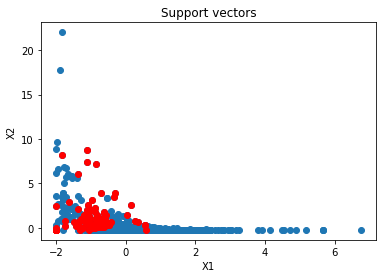

In [ ]:
# Get support vectors themselves
support_vectors = classifier.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

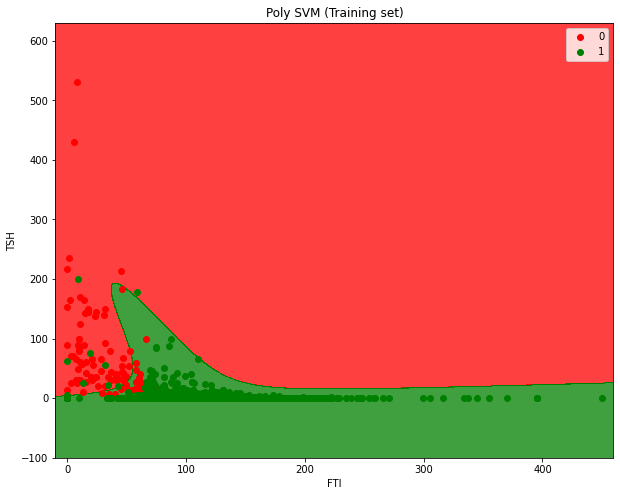

In [ ]:
#Viz of Polynomial SVM model
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 100, stop = X_set[:, 1].max() + 100, step = 0.25))
plt.figure(figsize=(10,8))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Poly SVM (Training set)')
plt.xlabel('FTI')
plt.ylabel('TSH')
plt.legend()
plt.show()

In [ ]:
#Predict
y_pred_psvm = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 17  10]
 [  0 517]]


In [ ]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_psvm))
print('R-squared train:',r2_score(y_train, y_pred_psvm))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_psvm))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))


Accuracy Score train:  0.9788311090658076
R-squared train: 0.5556948296707205
Mean Squared Error train: 0.02116889093419236


********************


Accuracy Score test:  0.9816176470588235
R-squared test: 0.610287269861738
Mean Squared Error test: 0.01838235294117647


              precision    recall  f1-score   support

           0       1.00      0.63      0.77        27
           1       0.98      1.00      0.99       517

    accuracy                           0.98       544
   macro avg       0.99      0.81      0.88       544
weighted avg       0.98      0.98      0.98       544



### RBF SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf' , random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

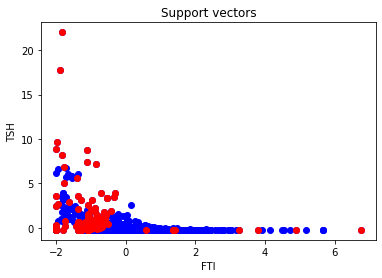

In [ ]:
# Get support vectors themselves
support_vectors = classifier.support_vectors_

# Visualize support vectors

#sns.lmplot(x='FTI', y= 'TSH', data=hypo, hue='status', palette='Set2', fit_reg=False, scatter_kws={"s": 70})
plt.scatter(X_train[:,0], X_train[:,1], color='blue')
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Support vectors')
plt.xlabel('FTI')
plt.ylabel('TSH')
plt.show()

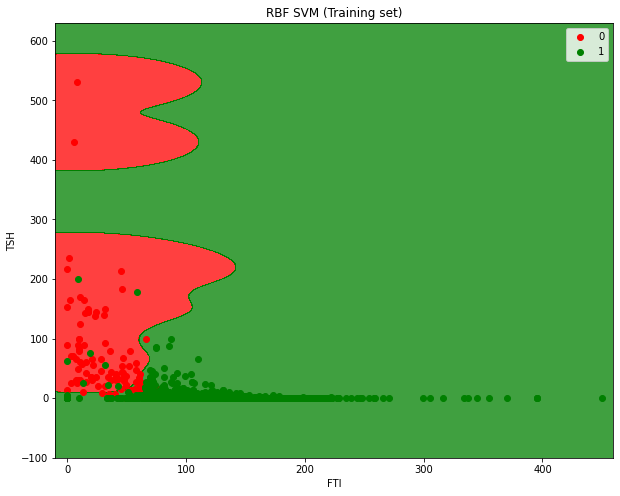

In [ ]:
#Viz of RBF SVM model
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 100, stop = X_set[:, 1].max() + 100, step = 0.25))
plt.figure(figsize=(10,8))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('RBF SVM (Training set)')
plt.xlabel('FTI')
plt.ylabel('TSH')
plt.legend()
plt.show()

In [ ]:
#Predict
y_pred_rbf = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 18   9]
 [  0 517]]


In [ ]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_rbf))
print('R-squared train:',r2_score(y_train, y_pred_rbf))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_rbf))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))


Accuracy Score train:  0.9829728485964105
R-squared train: 0.6426241021264492
Mean Squared Error train: 0.017027151403589506


********************


Accuracy Score test:  0.9834558823529411
R-squared test: 0.6492585428755642
Mean Squared Error test: 0.016544117647058824


              precision    recall  f1-score   support

           0       1.00      0.67      0.80        27
           1       0.98      1.00      0.99       517

    accuracy                           0.98       544
   macro avg       0.99      0.83      0.90       544
weighted avg       0.98      0.98      0.98       544



### HyperParameter Tuning

Since RBF SVM model returned the best R-squared and additionally the metric on the training set and test set was almost identical(not too much overfitting), it will be chosen, tuned and used on the whole dataset

In [ ]:
#Svm hyperparameter tuning

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#model
from sklearn.svm import SVC
classifier_tune = SVC(kernel='rbf' , random_state = 0)
classifier_tune.fit(X_train, y_train)


# define search space
params = dict()
params['C'] = (1e-3, 300.0, 'log-uniform')
params['gamma'] = (1e-3, 250.0, 'log-uniform')
#params['degree'] = (1,5)
params['kernel'] = ['rbf']

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the search
search = GridSearchCV(classifier_tune, params, n_jobs=-1, cv=cv, verbose=1)

# perform the search
search.fit(X_train, y_train)

# report the best result
print(search.best_score_)
print(search.best_params_)


Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9717724319677562
{'C': 300.0, 'gamma': 0.001, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.9s finished


In [ ]:
#predict
y_pred_tuned = search.predict(X_train)
y_pred = search.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 11  16]
 [  1 516]]


In [ ]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_tuned))
print('R-squared train:',r2_score(y_train, y_pred_tuned))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_tuned))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))


Accuracy Score train:  0.9728485964104924
R-squared train: 0.43013032501244586
Mean Squared Error train: 0.027151403589507593


********************


Accuracy Score test:  0.96875
R-squared test: 0.33748835876495464
Mean Squared Error test: 0.03125


              precision    recall  f1-score   support

           0       0.92      0.41      0.56        27
           1       0.97      1.00      0.98       517

    accuracy                           0.97       544
   macro avg       0.94      0.70      0.77       544
weighted avg       0.97      0.97      0.96       544



> The tuned model performs extremely poorly on the test data pointing to Overfitting (R-squared drops by about 20%) thus it is better to use the default version which performed better:

In [ ]:
#Using default version
classifier_default = SVC(kernel='rbf' , random_state = 0)
classifier_default.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#predict
y_pred_def = classifier_default.predict(X_train)
y_pred = classifier_default.predict(X_test)

In [ ]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_def))
print('R-squared train:',r2_score(y_train, y_pred_def))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_def))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))


Accuracy Score train:  0.9829728485964105
R-squared train: 0.6426241021264492
Mean Squared Error train: 0.017027151403589506


********************


Accuracy Score test:  0.9834558823529411
R-squared test: 0.6492585428755642
Mean Squared Error test: 0.016544117647058824


              precision    recall  f1-score   support

           0       1.00      0.67      0.80        27
           1       0.98      1.00      0.99       517

    accuracy                           0.98       544
   macro avg       0.99      0.83      0.90       544
weighted avg       0.98      0.98      0.98       544



Computing the accuracy with k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_default, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.07 %
Standard Deviation: 0.87 %


> As shown the best performance was from SVC(kernel='rbf', random_state = 0) and will be used on all the features:




### Applying Chosen Model to Whole Dataset (All Features)

In [ ]:
# Seperating the target from our data
X = hypo_eng.drop(['status'], axis=1)
y = hypo_eng['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Using default version
classifier_default = SVC(kernel='rbf' , random_state = 0)
classifier_default.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#predict
y_pred_def = classifier_default.predict(X_train)
y_pred = classifier_default.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 15  12]
 [  1 516]]


In [ ]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_def))
print('R-squared train:',r2_score(y_train, y_pred_def))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_def))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))


Accuracy Score train:  0.985734008283479
R-squared train: 0.7005769504302681
Mean Squared Error train: 0.014265991716520939


********************


Accuracy Score test:  0.9761029411764706
R-squared test: 0.4933734508202594
Mean Squared Error test: 0.02389705882352941


              precision    recall  f1-score   support

           0       0.94      0.56      0.70        27
           1       0.98      1.00      0.99       517

    accuracy                           0.98       544
   macro avg       0.96      0.78      0.84       544
weighted avg       0.98      0.98      0.97       544



In [ ]:
#cross validation of model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_default, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.07 %
Standard Deviation: 0.67 %


>As can be observed above, The RBF SVM model does indeed mantain a high accuracy of about 98% even after running all the features through the model. Alarmingly the R-squared values for both train and testing suffered greatly implying that the model was either not good enough or that it fit training data (though even in training it had a high of about 60% R-squared). The outcome shows that SVM is not the best option for this case. The Decision Tree models all outperformed the SVM's with an average of 80% R-squared. AdaBoost would thus be recommended as the solution to this particular business problem.

# Challenging the Solution

> The model that performed best was the AdaBoost Tree Classifier model with an R-squared train: 90% & R-squared test: 84%. Whilst also having impressive Precision, Recall and f1-score. This is especially important (Recall) in the health care sector where classes are usually highly imbalanced and we want to greatly reduce false negatives for diseases that may be life threatening.

>Although AdaBoost was chosen, better optimization and use of other models including ensemble ones may perform better than the model proposed as the solution here. The additional models tested like XGBoost and CatBoost posted impressive results.

>The feature engineering may also prove as a means to improving model performance for the SVM models. Though limited engineering was carried out here (binning and scaling) additional research may yield better and more efficient workflows.

# Follow up questions

## a) Did we have the right data?


> Yes, the data supplied was sufficient to perform classification at an acceptable accuracy, precision and recall as observed by the Decision Tree models.

## b) Do we need other data to answer our question?


> From the models, it seems that no additional data is required to create a model that predicts hypothyroidism or not in a patient given their symptoms unless as a means as improving the R-squared (from 80% the best to higher margins which may be desirable when working with a healthcare model).

## c) Did we have the right question?

> The question was the right one based on the business problem of Nairobi Hospital. They required a good model to predict hypothyrodism and as shown the models performed at a high accuracy and a good precision/recall to be useful to the hospital. Though additional data may prove to be helpful in increasing the reliability of the predictions.